# Analysis of a car slowing down due to drag only
This code analizes the effect of aerodynamic drag on a car's acceleration. Here, we apply one-dimensional Newtonian dynamics.

By:
**Juan A. Ramírez Macías**  
*Mech. Eng. Professor*  
*Universidad Pontificia Bolivariana*

In this problem we assume that the car starts with some velocity $v_0$ and the only force is aerodynamic drag. This force slows down the car.
![Fast car](./img/extremelyFastCar_wide.jpg)

## The problem
The assumptions are:
- The coordinate is $x$ assumed positive to the right.
- The aerodynamic drag is given by $F_A = -\frac{1}{2} \rho A C_A v ^ 2$, where $\rho$ is density, $A$ is projected area, and $C_A$ is drag coefficient. This requires that $v > 0$ for the model to be valid.

According to Newtonian dynamics
$$ F = m a.$$
If drag is the only force, then
$$  -\frac{1}{2} \rho A C_A v ^ 2 = m a$$
We define the drag constant $k_A = \frac{1}{2} \rho A C_A$. Then a more compact model is
$$ -k_A v ^ 2 = m a .$$

This means that the acceleration is given by
$$ a = -\frac{k_A}{m} v ^ 2.$$

## Obtaining the velocity as a function of time
We write the acceleration as
$$ \frac{dv}{dt} = -\frac{k_A}{m} v ^ 2.$$
Separating variables we obtain
$$ \frac{1}{v ^ 2}dv = -\frac{k_A}{m} dt.$$
Integrating from an initial condition to a generic future condition we write
$$ \int_{v_0}^{v}\frac{1}{v ^ 2}dv = -\int_{0}^{t}\frac{k_A}{m} dt.$$
Solving the integral we obtain
$$ -\left(\frac{1}{v} - \frac{1}{v_0} \right)  = -\frac{k_A}{m} t.$$
Finally, rearranging the equation we obtain the expression for $v(t)$
$$ v(t) = \frac{1}{ \frac{1}{v_0} + \frac{k_A}{m} t} $$

## Obtaining the position as a function of time
We write the velocity as
$$ \frac{dx}{dt} = \frac{1}{ \frac{1}{v_0} + \frac{k_A}{m} t} $$
Separating variables we obtain
$$ dx= \frac{1}{ \frac{1}{v_0} + \frac{k_A}{m} t} dt$$
Integrating from an initial condition to a generic future condition we write
$$ \int_{x_0}^{x} dx = \int_{0}^t \frac{1}{ \frac{1}{v_0} + \frac{k_A}{m} t} dt$$
With the help of integral calculus we get
$$ x - x_0 = \frac{m}{k_A} \operatorname{ln} \left( 1 + \frac{v_0 k_A}{m} t \right) $$
Finally, rearranging the equation we obtain the expression for $x(t)$
$$ x(t) = x_0 + \frac{m}{k_A} \operatorname{ln} \left( 1 + \frac{v_0 k_A}{m} t \right).$$
Please note that the expression is only valid for $\left( 1 + \frac{v_0 k_A}{m} t \right) > 0$, which is always true for positive constants and positive time.

## Import the required modules

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Define the parameters
The model's parameters are:
- Initial velocity: $v_0$ 
- Initial position: $x_0$
- Mass: $m$
- Drag constant $k_A = \frac{1}{2} \rho A C_A$,where $\rho$ is density, $A$ is projected area, and $C_A$ is drag coefficient.

In [5]:
# Initial velocity
v0_kmh = 80. # km/h
v0 = v0_kmh * 10. / 36. # m/s
print "v0 =", v0, "m/s"

# Initial position
x0 = 0. # m

# Drag constant
rho = 1.22 # kg/ m^3
A = 2.2425 # m^2
Ca = 0.3
Ka = 0.5 * rho * A * Ca
print "Ka =", Ka, "kg/m"

# Mass
m = 1000. # kg

v0 = 22.2222222222 m/s
Ka = 0.4103775 kg/m


## Compute arrays for time, position, velocity, and acceleration
According to the model we compute the following.

- Position:
$$ x(t) = x_0 + \frac{m}{k_A} ln \left( 1 + \frac{v_0 k_A}{m} t \right) $$

- Velocity:
$$ v(t) = \frac{1}{ \frac{1}{v_0} + \frac{k_A}{m} t} $$

- Acceleration:
$$ a(t) = -\frac{k_A}{m} v^2 = -\frac{k_A}{m} \left( \frac{1}{ \frac{1}{v_0} + \frac{k_A}{m} t} \right) ^2 $$

In [6]:
# Arrays
# Time
t = np.linspace(0., 4. * 60., 101.)
# Position
x = x0 + m / Ka * np.log(1. + v0 * Ka * t / m)
# Velocity
v = 1. / (1. / v0 + Ka * t / m)
# Aceleration
a = -Ka / m * v ** 2

## Plots

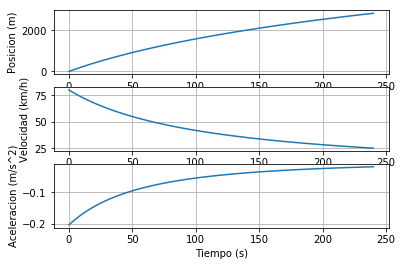

In [7]:
plt.figure()

# Position
plt.subplot(3,1,1)
plt.plot(t, x)
plt.ylabel("Posicion (m)")
plt.grid()

# Velocity
plt.subplot(3,1,2)
plt.plot(t, v * 3.6)
plt.ylabel("Velocidad (km/h)")
plt.grid()

# Acceleration
plt.subplot(3,1,3)
plt.plot(t, a)
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleracion (m/s^2)")
plt.grid()